In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取数据
df = pd.read_csv('/home/zengzw/tmp/all_merge.csv')

df

,count,frequency,cdr3_nt,cdr3_aa,v_gene,d_gene,j_gene,c_gene,Sample,cancer type,data source,Analysis_tool,chain
0,1080,0.181299,TGTCAGCAATATTATAGTACTCCTCGGACGTTC,CQQYYSTPRTF,IGKV4-1,.,IGKJ1,IGKC,HGSOC1-PB,healthy,HRA002184,TRUST,IGK
1,468,0.078563,TGCAGCTCATATACTAGCAGCGCCACTCTTTATGTCTTC,CSSYTSSATLYVF,IGLV2-14,.,IGLJ1,IGLC,HGSOC1-PB,healthy,HRA002184,TRUST,IGL
2,296,0.049689,TGCCAACAATATAGTGATGTAAAATGGCTCACTTTC,CQQYSDVKWLTF,IGKV1-5,.,IGKJ4,IGKC,HGSOC1-PB,healthy,HRA002184,TRUST,IGK
3,149,0.025013,TGCCAGCAATATGTTTCCTCACCCCTCACTTTC,CQQYVSSPLTF,IGKV3D-20,.,IGKJ4,IGKC,HGSOC1-PB,healthy,HRA002184,TRUST,IGK
4,59,0.009904,TGTGCGAAAGATCGGAGTGGATACAGCTATGGGGACGGCTACTTTG...,CAKDRSGYSYGDGYFDYW,IGHV3-23,IGHD5-18,IGHJ4,.,HGSOC1-PB,healthy,HRA002184,TRUST,IGH
...,...,...,...,...,...,...,...,...,...,...,...,...,...
153880,3608,0.000706,TGTGCGAGACTCCGAAACTTGGGGGAATGGCTCGAAAGACTTGACT...,CARLRNLGEWLERLDFW,IGHV4-59,NaN,IGHJ4,IGHG1,GC10-Tumor,GC,HRA000704,VDJ,IGH
153881,5452,0.001067,TGTGCGAGGGGGGGTGATGTTAGAAATGGCTACAAATACCGTTACT...,CARGGDVRNGYKYRYFQYW,IGHV3-21,IGHD5-24,IGHJ1,IGHG1,GC10-Tumor,GC,HRA000704,VDJ,IGH
153882,8170,0.001599,TGCATGGAAGCTCTACAAACTCCGCTCATTTTC,CMEALQTPLIF,IGKV2D-28,NaN,IGKJ4,IGKC,GC10-Tumor,GC,HRA000704,VDJ,IGK
153883,8686,0.001700,TGTGCGAGAGATTCATTCAGTGACTACGTTGCTGCCCGCCTTTTTG...,CARDSFSDYVAARLFDYW,IGHV1-18,NaN,IGHJ4,IGHG2,GC10-Tumor,GC,HRA000704,VDJ,IGH


In [28]:
df.loc[~df['v_gene'].str.startswith('IG'),'v_gene'] = '/'

In [48]:
# 首先检查'd_gene'列是否以'TR'开头，将结果存储在一个临时列
df['temp'] = df['d_gene'].str.startswith('TR')

# 然后填充任何NaN值为False，因为我们想保留这些行（因为它们不是以'TR'开头）
df['temp'] = df['temp'].fillna(False)

# 使用这个临时布尔列进行过滤
df = df[~df['temp']]

# 删除临时列
df.drop(columns=['temp'], inplace=True)


In [53]:
df['d_gene'] = df['d_gene'].fillna('/')
df.loc[~df['d_gene'].str.startswith('IG'),'d_gene'] = '/'
df

,count,frequency,cdr3_nt,cdr3_aa,v_gene,d_gene,j_gene,c_gene,Sample,cancer type,data source,Analysis_tool,chain
0,1080,0.181299,TGTCAGCAATATTATAGTACTCCTCGGACGTTC,CQQYYSTPRTF,IGKV4-1,/,IGKJ1,IGKC,HGSOC1-PB,healthy,HRA002184,TRUST,IGK
1,468,0.078563,TGCAGCTCATATACTAGCAGCGCCACTCTTTATGTCTTC,CSSYTSSATLYVF,IGLV2-14,/,IGLJ1,IGLC,HGSOC1-PB,healthy,HRA002184,TRUST,IGL
2,296,0.049689,TGCCAACAATATAGTGATGTAAAATGGCTCACTTTC,CQQYSDVKWLTF,IGKV1-5,/,IGKJ4,IGKC,HGSOC1-PB,healthy,HRA002184,TRUST,IGK
3,149,0.025013,TGCCAGCAATATGTTTCCTCACCCCTCACTTTC,CQQYVSSPLTF,IGKV3D-20,/,IGKJ4,IGKC,HGSOC1-PB,healthy,HRA002184,TRUST,IGK
4,59,0.009904,TGTGCGAAAGATCGGAGTGGATACAGCTATGGGGACGGCTACTTTG...,CAKDRSGYSYGDGYFDYW,IGHV3-23,IGHD5-18,IGHJ4,.,HGSOC1-PB,healthy,HRA002184,TRUST,IGH
...,...,...,...,...,...,...,...,...,...,...,...,...,...
153880,3608,0.000706,TGTGCGAGACTCCGAAACTTGGGGGAATGGCTCGAAAGACTTGACT...,CARLRNLGEWLERLDFW,IGHV4-59,/,IGHJ4,IGHG1,GC10-Tumor,GC,HRA000704,VDJ,IGH
153881,5452,0.001067,TGTGCGAGGGGGGGTGATGTTAGAAATGGCTACAAATACCGTTACT...,CARGGDVRNGYKYRYFQYW,IGHV3-21,IGHD5-24,IGHJ1,IGHG1,GC10-Tumor,GC,HRA000704,VDJ,IGH
153882,8170,0.001599,TGCATGGAAGCTCTACAAACTCCGCTCATTTTC,CMEALQTPLIF,IGKV2D-28,/,IGKJ4,IGKC,GC10-Tumor,GC,HRA000704,VDJ,IGK
153883,8686,0.001700,TGTGCGAGAGATTCATTCAGTGACTACGTTGCTGCCCGCCTTTTTG...,CARDSFSDYVAARLFDYW,IGHV1-18,/,IGHJ4,IGHG2,GC10-Tumor,GC,HRA000704,VDJ,IGH


In [42]:
df.loc[~df['j_gene'].str.startswith('IG'),'j_gene'] = '/'

In [55]:
# 首先检查'c_gene'列是否以'TR'开头，将结果存储在一个临时列
df['temp'] = df['c_gene'].str.startswith('TR')

# 然后填充任何NaN值为False，因为我们想保留这些行（因为它们不是以'TR'开头）
df['temp'] = df['temp'].fillna(False)

# 使用这个临时布尔列进行过滤
df = df[~df['temp']]

# 删除临时列
df.drop(columns=['temp'], inplace=True)

df['c_gene'] = df['c_gene'].fillna('/')
df.loc[~df['c_gene'].str.startswith('IG'),'c_gene'] = '/'
df

,count,frequency,cdr3_nt,cdr3_aa,v_gene,d_gene,j_gene,c_gene,Sample,cancer type,data source,Analysis_tool,chain
0,1080,0.181299,TGTCAGCAATATTATAGTACTCCTCGGACGTTC,CQQYYSTPRTF,IGKV4-1,/,IGKJ1,IGKC,HGSOC1-PB,healthy,HRA002184,TRUST,IGK
1,468,0.078563,TGCAGCTCATATACTAGCAGCGCCACTCTTTATGTCTTC,CSSYTSSATLYVF,IGLV2-14,/,IGLJ1,IGLC,HGSOC1-PB,healthy,HRA002184,TRUST,IGL
2,296,0.049689,TGCCAACAATATAGTGATGTAAAATGGCTCACTTTC,CQQYSDVKWLTF,IGKV1-5,/,IGKJ4,IGKC,HGSOC1-PB,healthy,HRA002184,TRUST,IGK
3,149,0.025013,TGCCAGCAATATGTTTCCTCACCCCTCACTTTC,CQQYVSSPLTF,IGKV3D-20,/,IGKJ4,IGKC,HGSOC1-PB,healthy,HRA002184,TRUST,IGK
4,59,0.009904,TGTGCGAAAGATCGGAGTGGATACAGCTATGGGGACGGCTACTTTG...,CAKDRSGYSYGDGYFDYW,IGHV3-23,IGHD5-18,IGHJ4,/,HGSOC1-PB,healthy,HRA002184,TRUST,IGH
...,...,...,...,...,...,...,...,...,...,...,...,...,...
153880,3608,0.000706,TGTGCGAGACTCCGAAACTTGGGGGAATGGCTCGAAAGACTTGACT...,CARLRNLGEWLERLDFW,IGHV4-59,/,IGHJ4,IGHG1,GC10-Tumor,GC,HRA000704,VDJ,IGH
153881,5452,0.001067,TGTGCGAGGGGGGGTGATGTTAGAAATGGCTACAAATACCGTTACT...,CARGGDVRNGYKYRYFQYW,IGHV3-21,IGHD5-24,IGHJ1,IGHG1,GC10-Tumor,GC,HRA000704,VDJ,IGH
153882,8170,0.001599,TGCATGGAAGCTCTACAAACTCCGCTCATTTTC,CMEALQTPLIF,IGKV2D-28,/,IGKJ4,IGKC,GC10-Tumor,GC,HRA000704,VDJ,IGK
153883,8686,0.001700,TGTGCGAGAGATTCATTCAGTGACTACGTTGCTGCCCGCCTTTTTG...,CARDSFSDYVAARLFDYW,IGHV1-18,/,IGHJ4,IGHG2,GC10-Tumor,GC,HRA000704,VDJ,IGH


In [56]:
df[~df['c_gene'].str.startswith('IG')]

,count,frequency,cdr3_nt,cdr3_aa,v_gene,d_gene,j_gene,c_gene,Sample,cancer type,data source,Analysis_tool,chain
4,59,0.009904,TGTGCGAAAGATCGGAGTGGATACAGCTATGGGGACGGCTACTTTG...,CAKDRSGYSYGDGYFDYW,IGHV3-23,IGHD5-18,IGHJ4,/,HGSOC1-PB,healthy,HRA002184,TRUST,IGH
20,19,0.003190,TGCAGCTCATATACTAGCAGCGCCACTCTTTATGTCTTC,CSSYTSSATLYVF,IGLV2-14,/,/,/,HGSOC1-PB,healthy,HRA002184,TRUST,IGL
89,7,0.001175,TGTGCGAAAGATCGATTAGTGGGGGCTATTGATGCTTTTGATATCTGG,CAKDRLVGAIDAFDIW,IGHV3-23,IGHD1-26,IGHJ3,/,HGSOC1-PB,healthy,HRA002184,TRUST,IGH
92,6,0.001007,TGTGCGAGAGGCTCTTCGGTGGTCATTCCCCTCCCGTTTGAGTCCTGG,CARGSSVVIPLPFESW,IGHV4-34,IGHD4-23,IGHJ4,/,HGSOC1-PB,healthy,HRA002184,TRUST,IGH
102,5,0.000839,TGTGCGAAAGATCGGAGTGGATACAGCTATGGGGACGGCTACTTTG...,CAKDRSGYSYGDGYFDYW,IGHV3-23,IGHD5-18,IGHJ4,/,HGSOC1-PB,healthy,HRA002184,TRUST,IGH
...,...,...,...,...,...,...,...,...,...,...,...,...,...
153707,34,0.000007,TGTGCGAGTCTTTCCGACTCCTATTACTACGCTATGGACGTCTGG,CASLSDSYYYAMDVW,IGHV1-18,/,IGHJ6,/,GC10-Tumor,GC,HRA000704,VDJ,IGH
153727,66,0.000013,TGTGCGAAAGATCACGTCGCGTTACGATCTTTTGACTGGTTACCCA...,CAKDHVALRSFDWLPTTKYGLDVW,IGHV3-30,IGHD3-9,IGHJ6,/,GC10-Tumor,GC,HRA000704,VDJ,IGH
153736,36,0.000007,TGTGCGAGAGATCGAGTGGATGGTACCTTCGACGGTATGGATGTCTGG,CARDRVDGTFDGMDVW,IGHV1-69D,/,IGHJ6,/,GC10-Tumor,GC,HRA000704,VDJ,IGH
153755,60,0.000012,TGTGCGAGACGCGTCTCGAGTGTAACAACTCGTCGTGGACAAAACT...,CARRVSSVTTRRGQNWFDPW,IGHV4-39,/,IGHJ5,/,GC10-Tumor,GC,HRA000704,VDJ,IGH


In [79]:
df

,chain,count,frequency,cdr3_nt,cdr3_aa,v_gene,d_gene,j_gene,c_gene,Sample,cancer type,data source,Analysis_tool
0,IGK,1080,0.182402,TGTCAGCAATATTATAGTACTCCTCGGACGTTC,CQQYYSTPRTF,IGKV4-1,/,IGKJ1,IGKC,HGSOC1-PB,healthy,HRA002184,TRUST
1,IGL,468,0.079041,TGCAGCTCATATACTAGCAGCGCCACTCTTTATGTCTTC,CSSYTSSATLYVF,IGLV2-14,/,IGLJ1,IGLC,HGSOC1-PB,healthy,HRA002184,TRUST
2,IGK,296,0.049992,TGCCAACAATATAGTGATGTAAAATGGCTCACTTTC,CQQYSDVKWLTF,IGKV1-5,/,IGKJ4,IGKC,HGSOC1-PB,healthy,HRA002184,TRUST
3,IGK,149,0.025165,TGCCAGCAATATGTTTCCTCACCCCTCACTTTC,CQQYVSSPLTF,IGKV3D-20,/,IGKJ4,IGKC,HGSOC1-PB,healthy,HRA002184,TRUST
4,IGH,59,0.009965,TGTGCGAAAGATCGGAGTGGATACAGCTATGGGGACGGCTACTTTG...,CAKDRSGYSYGDGYFDYW,IGHV3-23,IGHD5-18,IGHJ4,/,HGSOC1-PB,healthy,HRA002184,TRUST
...,...,...,...,...,...,...,...,...,...,...,...,...,...
153880,IGH,3608,0.000706,TGTGCGAGACTCCGAAACTTGGGGGAATGGCTCGAAAGACTTGACT...,CARLRNLGEWLERLDFW,IGHV4-59,/,IGHJ4,IGHG1,GC10-Tumor,GC,HRA000704,VDJ
153881,IGH,5452,0.001067,TGTGCGAGGGGGGGTGATGTTAGAAATGGCTACAAATACCGTTACT...,CARGGDVRNGYKYRYFQYW,IGHV3-21,IGHD5-24,IGHJ1,IGHG1,GC10-Tumor,GC,HRA000704,VDJ
153882,IGK,8170,0.001599,TGCATGGAAGCTCTACAAACTCCGCTCATTTTC,CMEALQTPLIF,IGKV2D-28,/,IGKJ4,IGKC,GC10-Tumor,GC,HRA000704,VDJ
153883,IGH,8686,0.001700,TGTGCGAGAGATTCATTCAGTGACTACGTTGCTGCCCGCCTTTTTG...,CARDSFSDYVAARLFDYW,IGHV1-18,/,IGHJ4,IGHG2,GC10-Tumor,GC,HRA000704,VDJ


In [70]:
df['v_gene'].str.startswith('/').value_counts()

False    152831
Name: v_gene, dtype: int64

In [71]:
df['d_gene'].str.startswith('/').value_counts()

True     108394
False     44437
Name: d_gene, dtype: int64

In [72]:
df['j_gene'].str.startswith('/').value_counts()

False    152831
Name: j_gene, dtype: int64

In [73]:
df['c_gene'].str.startswith('/').value_counts()

False    136534
True      16297
Name: c_gene, dtype: int64

In [107]:
df['frequency_batch_mul1000'] = df.groupby('data source')['count'].transform(lambda x: x*1000 / x.sum())

df

<ipython-input-107-b3412a0c88bc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['frequency_batch_mul1000'] = df.groupby('data source')['count'].transform(lambda x: x*1000 / x.sum())


,chain,count,frequency,cdr3_nt,cdr3_aa,v_gene,d_gene,j_gene,c_gene,Sample,cancer type,data source,Analysis_tool,group,frequency_batch,frequency_batch_mul1000
0,IGK,1080,0.182402,TGTCAGCAATATTATAGTACTCCTCGGACGTTC,CQQYYSTPRTF,IGKV4-1,/,IGKJ1,IGKC,HGSOC1-PB,healthy,HRA002184,TRUST,IGKV4-1&/&IGKJ1,0.003950,3.950299
1,IGL,468,0.079041,TGCAGCTCATATACTAGCAGCGCCACTCTTTATGTCTTC,CSSYTSSATLYVF,IGLV2-14,/,IGLJ1,IGLC,HGSOC1-PB,healthy,HRA002184,TRUST,IGLV2-14&/&IGLJ1,0.001712,1.711796
2,IGK,296,0.049992,TGCCAACAATATAGTGATGTAAAATGGCTCACTTTC,CQQYSDVKWLTF,IGKV1-5,/,IGKJ4,IGKC,HGSOC1-PB,healthy,HRA002184,TRUST,IGKV1-5&/&IGKJ4,0.001083,1.082675
3,IGK,149,0.025165,TGCCAGCAATATGTTTCCTCACCCCTCACTTTC,CQQYVSSPLTF,IGKV3D-20,/,IGKJ4,IGKC,HGSOC1-PB,healthy,HRA002184,TRUST,IGKV3D-20&/&IGKJ4,0.000545,0.544995
4,IGH,59,0.009965,TGTGCGAAAGATCGGAGTGGATACAGCTATGGGGACGGCTACTTTG...,CAKDRSGYSYGDGYFDYW,IGHV3-23,IGHD5-18,IGHJ4,/,HGSOC1-PB,healthy,HRA002184,TRUST,IGHV3-23&IGHD5-18&IGHJ4,0.000216,0.215803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153880,IGH,3608,0.000706,TGTGCGAGACTCCGAAACTTGGGGGAATGGCTCGAAAGACTTGACT...,CARLRNLGEWLERLDFW,IGHV4-59,/,IGHJ4,IGHG1,GC10-Tumor,GC,HRA000704,VDJ,IGHV4-59&/&IGHJ4,0.000020,0.019776
153881,IGH,5452,0.001067,TGTGCGAGGGGGGGTGATGTTAGAAATGGCTACAAATACCGTTACT...,CARGGDVRNGYKYRYFQYW,IGHV3-21,IGHD5-24,IGHJ1,IGHG1,GC10-Tumor,GC,HRA000704,VDJ,IGHV3-21&IGHD5-24&IGHJ1,0.000030,0.029883
153882,IGK,8170,0.001599,TGCATGGAAGCTCTACAAACTCCGCTCATTTTC,CMEALQTPLIF,IGKV2D-28,/,IGKJ4,IGKC,GC10-Tumor,GC,HRA000704,VDJ,IGKV2D-28&/&IGKJ4,0.000045,0.044780
153883,IGH,8686,0.001700,TGTGCGAGAGATTCATTCAGTGACTACGTTGCTGCCCGCCTTTTTG...,CARDSFSDYVAARLFDYW,IGHV1-18,/,IGHJ4,IGHG2,GC10-Tumor,GC,HRA000704,VDJ,IGHV1-18&/&IGHJ4,0.000048,0.047608


In [124]:
df['group_vj'] = df['v_gene']+'&'+df['j_gene']
df_h = df[df['chain'] == 'IGH']

<ipython-input-124-dfd713418d21>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['group_vj'] = df['v_gene']+'&'+df['j_gene']


In [125]:
df_h['d_gene'].value_counts()

/                16742
IGHD3-10          5381
IGHD3-22          3591
IGHD2-2           3185
IGHD6-13          2776
IGHD2-21          2549
IGHD1-26          2455
IGHD3-3           2381
IGHD2-15          2010
IGHD6-19          1995
IGHD4-17          1971
IGHD3-9           1861
IGHD3-16          1711
IGHD2-8           1463
IGHD1-1           1425
IGHD5-12          1286
IGHD5-18          1138
IGHD6-6           1129
IGHD5-24          1127
IGHD2/OR15-2b      800
IGHD4-23           780
IGHD3/OR15-3b      645
IGHD1-20           613
IGHD1-7            609
IGHD4-11           403
IGHD4/OR15-4b      248
IGHD1-14           240
IGHD6-25           174
IGHD5/OR15-5b      163
IGHD7-27           141
IGHD1/OR15-1b      100
IGHD5-5             67
IGHD4-4             12
IGHD3/OR15-3B        4
IGHD1/OR15-1A        1
IGHD5/OR15-5B        1
IGHD1/OR15-1B        1
IGHD4/OR15-4B        1
Name: d_gene, dtype: int64

In [130]:
df_h['v_gene'].value_counts()

IGHV3-23        4993
IGHV4-39        4110
IGHV4-59        3462
IGHV4-34        3176
IGHV3-30        2876
                ... 
IGHV1-38-4         1
IGHV2-70D          1
IGHV3-54           1
IGHV8-51-1         1
IGHV3/OR15-7       1
Name: v_gene, Length: 82, dtype: int64

In [304]:
df = pd.read_csv('/home/zengzw/tmp/2_all_grouping_IGH.csv')

<Figure size 7200x432 with 0 Axes>

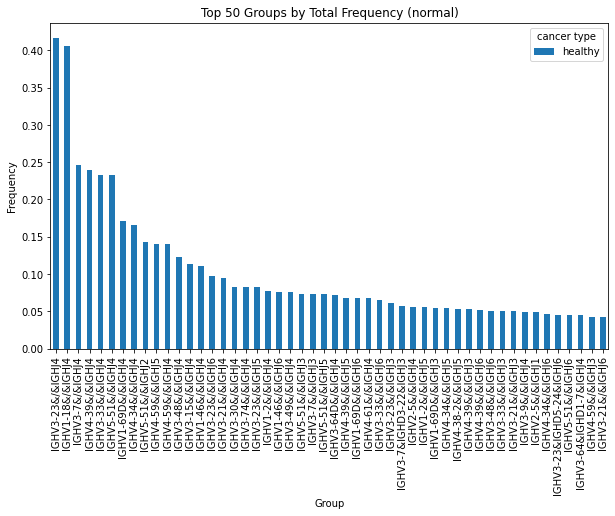

In [305]:
df = df.loc[df['cancer type'] == 'healthy']

# 按group分组，计算每个group的frequency总和
group_total_frequencies = df.groupby('group')['frequency'].sum().reset_index(name='total_frequency')

# 根据total_frequency排序，并获取top 30的group
top_30_groups = group_total_frequencies.sort_values(by='total_frequency', ascending=False).head(50)['group']


# 筛选出top 30 groups对应的原始数据
top_30_data = df[df['group'].isin(top_30_groups)]

# 重新按照top 30 groups的total_frequency排序
top_30_data = top_30_data.merge(group_total_frequencies, on='group')
top_30_data_sorted = top_30_data.sort_values(by='total_frequency', ascending=False)


# 对筛选出的数据进行分组求和
grouped_top_30_data = top_30_data_sorted.groupby(['group', 'cancer type'])['frequency'].sum().reset_index()

# 为每个group和cancer type组合计算frequency的和
grouped_data = top_30_data_sorted.groupby(['group', 'cancer type'])['frequency'].sum().unstack(fill_value=0)

# 确保 grouped_data 已经准备好并按照 total_frequency 排序
# 因为 grouped_data 是以 group 为索引的，我们需要确保这个索引是按照 total_frequency 排序的
# 我们可以重新利用 top_30_data_sorted 来获取正确的顺序
groups_in_order = top_30_data_sorted['group'].unique()

# 根据已排序的 groups_in_order 对 grouped_data 进行重索引以保证顺序
grouped_data_sorted = grouped_data.reindex(groups_in_order)

plt.figure(figsize=(100, 6))
# 绘制堆叠条形图
grouped_data_sorted.plot(kind='bar', stacked=True, figsize=(10, 6), legend=True)

plt.title('Top 50 Groups by Total Frequency (normal)')
plt.xlabel('Group')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # 如果 group 名字太长或者太多，可以旋转标签以改善显示

plt.savefig('/home/zengzw/tmp/figures/top_50_groups_in_normal.png')
plt.show()




In [245]:
grouped_data_sorted.to_csv('/home/zengzw/tmp/top_50_groups_in_normal')

In [288]:
df1 = pd.read_csv('/home/zengzw/tmp/top_50_groups_in_cancer')
df2 = pd.read_csv('/home/zengzw/tmp/top_50_groups_in_normal')

In [269]:
df1.to_csv('/home/zengzw/tmp/top_50_groups_in_cancer.csv')
df2.to_csv('/home/zengzw/tmp/top_50_groups_in_normal.csv')

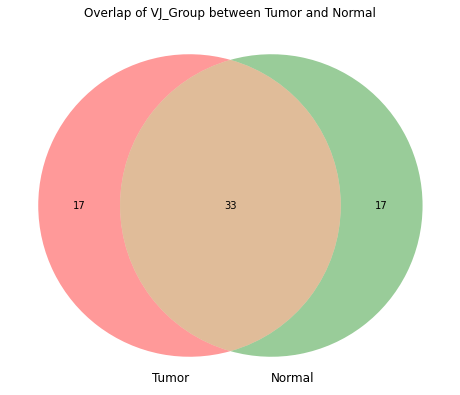

In [290]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import pandas as pd

# 假设df1和df2是你的两个DataFrame，且'A'是你想要比较的列

# 提取两个DataFrame中'A'列的值，转换为集合
set1 = set(df1['group'])
set2 = set(df2['group'])

# 绘制Venn图
plt.figure(figsize=(8, 8))
venn2([set1, set2], ('Tumor', 'Normal'))
plt.title('Overlap of VJ_Group between Tumor and Normal')
plt.savefig('/home/zengzw/tmp/figures/Venn')
plt.show()


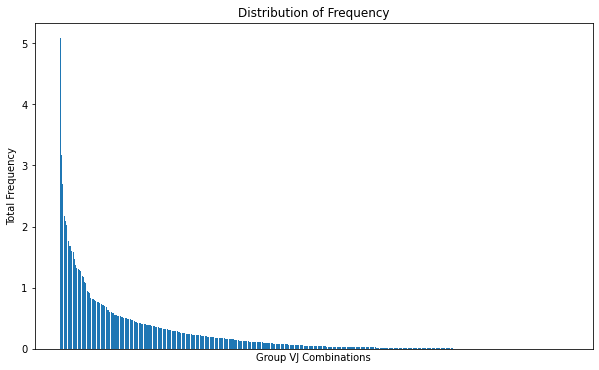

In [259]:
# 根据frequency列对vj_counts_df进行降序排序
vj_counts_df_sorted = vj_counts_df.sort_values(by='frequency', ascending=False)
import matplotlib.pyplot as plt

# 设置图形大小
plt.figure(figsize=(10, 6))

# 绘制frequency的分布图
plt.bar(x=range(len(vj_counts_df_sorted)), height=vj_counts_df_sorted['frequency'])

# 添加标题和标签
plt.title('Distribution of Frequency')
plt.xlabel('Group VJ Combinations')
plt.ylabel('Total Frequency')

# 由于不需要显示group_vj的值，我们可以省略x轴的刻度标签或者简单地设置为范围数字
plt.xticks([])  # 隐藏x轴的刻度标签

# 显示图形
plt.show()


In [268]:
# 创建df1和df2中'group'列唯一值的集合
set_df1 = set(df1['group'])
set_df2 = set(df2['group'])

# 找出两个集合的交集（重叠的部分）
public_groups = set_df1.intersection(set_df2)

# 标记df1中的'group'列
df1['public/specific'] = df1['group'].apply(lambda x: 'public' if x in public_groups else 'specific')

# 标记df2中的'group'列
df2['public/specific'] = df2['group'].apply(lambda x: 'public' if x in public_groups else 'specific')

# 显示结果
print(df1.head())
print(df2.head())


              group   BC        GC  Leukemia   OC       sum public/specific
0  IGHV3-23&/&IGHJ4  0.0  0.235831  0.041344  0.0  0.277175          public
1  IGHV1-18&/&IGHJ4  0.0  0.259637  0.004055  0.0  0.263692          public
2  IGHV5-51&/&IGHJ4  0.0  0.228753  0.022175  0.0  0.250929          public
3  IGHV4-39&/&IGHJ4  0.0  0.174665  0.068143  0.0  0.242807          public
4   IGHV3-7&/&IGHJ4  0.0  0.204269  0.026133  0.0  0.230402          public
              group   healthy       sum public/specific
0  IGHV3-23&/&IGHJ4  0.416423  0.416423          public
1  IGHV1-18&/&IGHJ4  0.405334  0.405334          public
2   IGHV3-7&/&IGHJ4  0.246646  0.246646          public
3  IGHV4-39&/&IGHJ4  0.239009  0.239009          public
4  IGHV3-33&/&IGHJ4  0.232882  0.232882          public


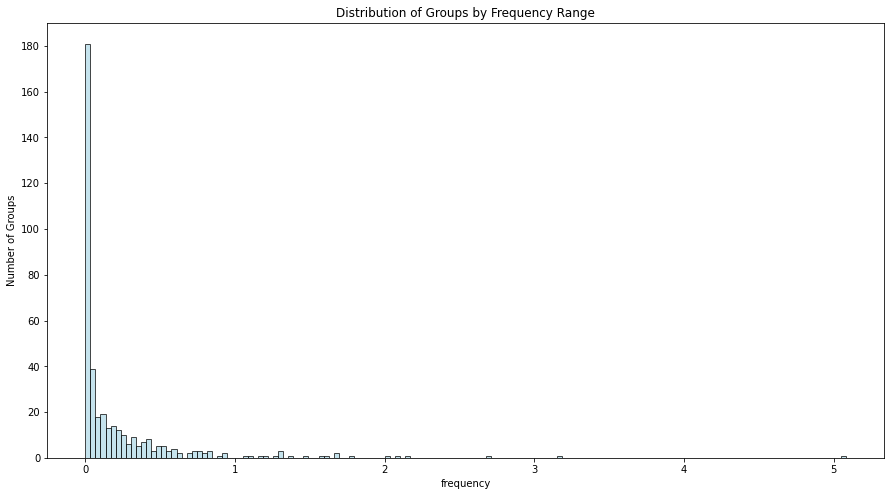

In [301]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 假设vj_counts_df已经按照之前的指示准备好，且包含'frequency'列
# 示例数据
# vj_counts_df = pd.DataFrame({'group_vj': ['group1', 'group2', ...],
#                              'frequency': [100, 150, ...]})

# 设置图形大小
plt.figure(figsize=(15, 8))

# 绘制直方图
# 使用vj_counts_df中的'frequency'数据
# bins参数可以根据需要进行调整，例如：bins=10，或bins=[0, 50, 100, 150, ...]
n, bins, patches = plt.hist(vj_counts_df['frequency'], bins=150, color='lightblue', edgecolor='black', alpha=0.7)

# 添加标题和轴标签
plt.title('Distribution of Groups by Frequency Range')
plt.xlabel('frequency')
plt.ylabel('Number of Groups')
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(20))
plt.savefig('/home/zengzw/tmp/figures/Distribution of Groups by Frequency Range(not log)')
# 显示图形
plt.show()


In [184]:
vj_counts_df.to_csv('/home/zengzw/tmp/VJ_Grouping.csv')

In [227]:
import pandas as pd
from collections import Counter
import numpy as np
from sklearn.cluster import KMeans

def kmer_frequency(sequence, k=3, kmer_set=None):
    kmers = [sequence[i:i+k] for i in range(len(sequence)-k+1)]
    counter = Counter(kmers)
    if kmer_set is None:
        kmer_set = sorted(set(kmers))
    frequency_vector = [counter[kmer] / sum(counter.values()) if kmer in counter else 0 for kmer in kmer_set]
    return np.array(frequency_vector)


# 创建全局k-mer集合
import itertools

# 氨基酸标准20个字母表示
amino_acids = 'ACDEFGHIKLMNPQRSTVWY'

# k-mer的长度
k = 3

# 使用itertools.product生成所有可能的k-mer组合
all_kmers = [''.join(kmer) for kmer in itertools.product(amino_acids, repeat=k)]

# 显示生成的k-mer数量和一些示例
print(f"Total {len(all_kmers)} {k}-mers generated.")
print(all_kmers[:10])  # 显示前10个k-mer作为示例


# 计算k-mer频率向量，确保长度一致
features = np.array([kmer_frequency(seq, k=k, kmer_set=all_kmers) for seq in sequences])


# 初始化一个空的列表来存储所有聚类标签
all_cluster_labels = []

i = 0
# 对每个group_vj进行聚类

group = 'IGHV3-23&IGHJ4'
# 选取当前group的特征

group_indices = df[df['group_vj'] == group].index
group_features = features[group_indices]

# 应用KMeans聚类
n_clusters = min(len(group_features), 5)  # 确保聚类数不超过组内元素数
if n_clusters > 5:  # 只有当组内元素多于1个时才进行聚类
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(group_features)
    cluster_labels = [f"{group}_{label}" for label in kmeans.labels_]
else:
    cluster_labels = [f"{group}_0"] * len(group_features)  # 单个元素的情形

cluster_labels


Total 8000 3-mers generated.
['AAA', 'AAC', 'AAD', 'AAE', 'AAF', 'AAG', 'AAH', 'AAI', 'AAK', 'AAL']


['IGHV3-23&IGHJ4_0',
 'IGHV3-23&IGHJ4_0',
 'IGHV3-23&IGHJ4_0',
 'IGHV3-23&IGHJ4_0',
 'IGHV3-23&IGHJ4_0',
 'IGHV3-23&IGHJ4_0',
 'IGHV3-23&IGHJ4_0',
 'IGHV3-23&IGHJ4_0',
 'IGHV3-23&IGHJ4_0',
 'IGHV3-23&IGHJ4_0',
 'IGHV3-23&IGHJ4_0',
 'IGHV3-23&IGHJ4_0',
 'IGHV3-23&IGHJ4_0',
 'IGHV3-23&IGHJ4_0',
 'IGHV3-23&IGHJ4_0',
 'IGHV3-23&IGHJ4_0',
 'IGHV3-23&IGHJ4_0',
 'IGHV3-23&IGHJ4_0',
 'IGHV3-23&IGHJ4_0',
 'IGHV3-23&IGHJ4_0',
 'IGHV3-23&IGHJ4_0',
 'IGHV3-23&IGHJ4_0',
 'IGHV3-23&IGHJ4_0',
 'IGHV3-23&IGHJ4_0',
 'IGHV3-23&IGHJ4_0',
 'IGHV3-23&IGHJ4_0',
 'IGHV3-23&IGHJ4_0',
 'IGHV3-23&IGHJ4_0',
 'IGHV3-23&IGHJ4_0',
 'IGHV3-23&IGHJ4_0',
 'IGHV3-23&IGHJ4_0',
 'IGHV3-23&IGHJ4_0',
 'IGHV3-23&IGHJ4_0',
 'IGHV3-23&IGHJ4_0',
 'IGHV3-23&IGHJ4_0',
 'IGHV3-23&IGHJ4_0',
 'IGHV3-23&IGHJ4_0',
 'IGHV3-23&IGHJ4_0',
 'IGHV3-23&IGHJ4_0',
 'IGHV3-23&IGHJ4_0',
 'IGHV3-23&IGHJ4_0',
 'IGHV3-23&IGHJ4_0',
 'IGHV3-23&IGHJ4_0',
 'IGHV3-23&IGHJ4_0',
 'IGHV3-23&IGHJ4_0',
 'IGHV3-23&IGHJ4_0',
 'IGHV3-23&IGHJ4_0',
 'IGHV3-23&IG

In [230]:
len(group_features)

2985

In [218]:
df.iloc[10:20]

,chain,count,frequency,cdr3_nt,cdr3_aa,v_gene,d_gene,j_gene,c_gene,Sample,cancer type,data source,Analysis_tool,group,frequency_batch,frequency_batch_mul1000,group_vj,clustering
10,IGH,4,0.000676,TGTGCGAGATGGTGGAGGGACGTGTCAAGTTATCTGTGGTACTTCG...,CARWWRDVSSYLWYFDLW,IGHV3-48,IGHD3-16,IGHJ2,/,HGSOC1-PB,healthy,HRA002184,TRUST,IGHV3-48&IGHD3-16&IGHJ2,0.000015,0.014631,IGHV3-48&IGHJ2,IGHV3-23&IGHJ4_0
11,IGH,4,0.000676,TGTGCGAGACTGGGGAGTGGGAGTTACTTCCCCCCCCTGTACGCTA...,CARLGSGSYFPPLYAMDVW,IGHV4-39,IGHD1-26,IGHJ6,IGHA2,HGSOC1-PB,healthy,HRA002184,TRUST,IGHV4-39&IGHD1-26&IGHJ6,0.000015,0.014631,IGHV4-39&IGHJ6,IGHV3-23&IGHJ4_3
12,IGH,3,0.000507,TGTACAAGAGGGAGGGGGAACCCGCAGCCTAATTACTACCACGGTT...,CTRGRGNPQPNYYHGLDVW,IGHV3-74,IGHD3-22,IGHJ6,/,HGSOC1-PB,healthy,HRA002184,TRUST,IGHV3-74&IGHD3-22&IGHJ6,0.000011,0.010973,IGHV3-74&IGHJ6,IGHV3-23&IGHJ4_1
13,IGH,3,0.000507,TGTGCGACCCCCCTCGGACTAGGATACTGTAGTAGTACCAGCTGCT...,CATPLGLGYCSSTSCYDWYFDLW,IGHV4-39,IGHD2-2,IGHJ2,IGHG1,HGSOC1-PB,healthy,HRA002184,TRUST,IGHV4-39&IGHD2-2&IGHJ2,0.000011,0.010973,IGHV4-39&IGHJ2,IGHV3-23&IGHJ4_1
14,IGH,3,0.000507,TGTGCGGCGTGGGCTGGCAGCAGTTGGTTTGATTACTGG,CAAWAGSSWFDYW,IGHV3-7,IGHD6-13,IGHJ4,IGHA2,HGSOC1-PB,healthy,HRA002184,TRUST,IGHV3-7&IGHD6-13&IGHJ4,0.000011,0.010973,IGHV3-7&IGHJ4,IGHV3-23&IGHJ4_3
15,IGH,3,0.000507,TGTGCAAGAGACCTAGAAGGGTCCATTGACTACTGG,CARDLEGSIDYW,IGHV3-74,IGHD2-21,IGHJ4,IGHA2,HGSOC1-PB,healthy,HRA002184,TRUST,IGHV3-74&IGHD2-21&IGHJ4,0.000011,0.010973,IGHV3-74&IGHJ4,IGHV3-23&IGHJ4_3
16,IGH,3,0.000507,TGTGCGAGAGATGGCGGTTGGAACTACTACATGGACGTCTGG,CARDGGWNYYMDVW,IGHV4-61,IGHD1-26,IGHJ6,/,HGSOC1-PB,healthy,HRA002184,TRUST,IGHV4-61&IGHD1-26&IGHJ6,0.000011,0.010973,IGHV4-61&IGHJ6,IGHV3-23&IGHJ4_0
17,IGH,3,0.000507,TGTGCGAGAGCCCGTCATCGGCCCTTCGACAATATTGTTTTAGTAC...,CARARHRPFDNIVLVPAAPFDYW,IGHV3-11,IGHD2-2,IGHJ4,IGHG1,HGSOC1-PB,healthy,HRA002184,TRUST,IGHV3-11&IGHD2-2&IGHJ4,0.000011,0.010973,IGHV3-11&IGHJ4,IGHV3-23&IGHJ4_1
18,IGH,3,0.000507,TGTGCGAGAGAATATTACTATGGTTCGGGGAGACATGCTTTTGATA...,CAREYYYGSGRHAFDIW,IGHV4-59,IGHD3-10,IGHJ3,IGHG2,HGSOC1-PB,healthy,HRA002184,TRUST,IGHV4-59&IGHD3-10&IGHJ3,0.000011,0.010973,IGHV4-59&IGHJ3,IGHV3-23&IGHJ4_2
19,IGH,3,0.000507,TGTTCGAAAGATCGAAACTACGAGGGGGGTCTCTACTACTACGGTA...,CSKDRNYEGGLYYYGMDVW,IGHV3-21,IGHD3-10,IGHJ6,IGHA2,HGSOC1-PB,healthy,HRA002184,TRUST,IGHV3-21&IGHD3-10&IGHJ6,0.000011,0.010973,IGHV3-21&IGHJ6,IGHV3-23&IGHJ4_2


In [270]:
import pandas as pd

# 示例数据，替换为你的DataFrame
# df = pd.DataFrame({'v_gene': [...], 'j_gene': [...], 'frequency': [...]})

# 计算每对v_gene和j_gene组合的frequency总和
data_pivot = df.pivot_table(index='v_gene', columns='j_gene', values='frequency', aggfunc='sum', fill_value=0)
import matplotlib.pyplot as plt
import numpy as np

# 绘制热图
plt.figure(figsize=(10, 8))
plt.imshow(data_pivot, cmap='viridis', aspect='auto')

# 添加颜色条
plt.colorbar(label='Frequency Total Sum')

# 设置轴标签
plt.xlabel('J Gene')
plt.ylabel('V Gene')

# 设置轴刻度
plt.xticks(np.arange(len(data_pivot.columns)), data_pivot.columns, rotation=90)
plt.yticks(np.arange(len(data_pivot.index)), data_pivot.index)

# 设置标题
plt.title('Heatmap of Frequency Total Sum by V Gene and J Gene Combination')

plt.show()


,group,BC,GC,Leukemia,OC,sum,public/specific
0,IGHV3-23&/&IGHJ4,0.000000,0.235831,0.041344,0.000000,0.277175,public
1,IGHV1-18&/&IGHJ4,0.000000,0.259637,0.004055,0.000000,0.263692,public
2,IGHV5-51&/&IGHJ4,0.000000,0.228753,0.022175,0.000000,0.250929,public
3,IGHV4-39&/&IGHJ4,0.000000,0.174665,0.068143,0.000000,0.242807,public
4,IGHV3-7&/&IGHJ4,0.000000,0.204269,0.026133,0.000000,0.230402,public
5,IGHV3-48&/&IGHJ4,0.000000,0.102497,0.079517,0.000000,0.182014,public
6,IGHV3-33&/&IGHJ4,0.000000,0.145065,0.027412,0.000000,0.172477,public
7,IGHV3-23&IGHD6-13&IGHJ4,0.010738,0.000637,0.000000,0.160939,0.172314,specific
8,IGHV2-5&IGHD3-22&IGHJ4,0.001198,0.000330,0.000000,0.158280,0.159807,specific
9,IGHV2-5&/&IGHJ6,0.000000,0.125914,0.005335,0.000000,0.131249,specific


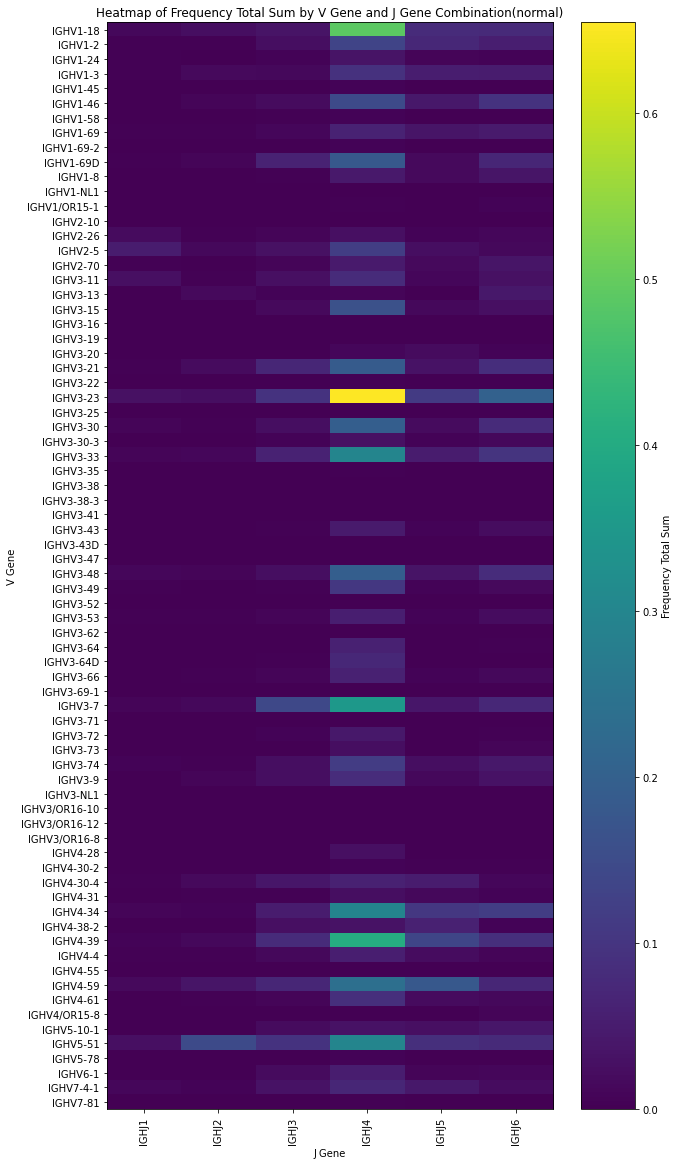

In [318]:
import pandas as pd

df = pd.read_csv('/home/zengzw/tmp/2_all_grouping_IGH.csv')
df = df.loc[df['cancer type'] == 'healthy']

# 示例数据，替换为你的DataFrame
# df = pd.DataFrame({'v_gene': [...], 'j_gene': [...], 'frequency': [...]})

# 计算每对v_gene和j_gene组合的frequency总和
data_pivot = df.pivot_table(index='v_gene', columns='j_gene', values='frequency', aggfunc='sum', fill_value=0)
import matplotlib.pyplot as plt
import numpy as np

# 绘制热图
plt.figure(figsize=(10, 20))
plt.imshow(data_pivot, cmap='viridis', aspect='auto')

# 添加颜色条
plt.colorbar(label='Frequency Total Sum')

# 设置轴标签
plt.xlabel('J Gene')
plt.ylabel('V Gene')

# 设置轴刻度
plt.xticks(np.arange(len(data_pivot.columns)), data_pivot.columns, rotation=90)
plt.yticks(np.arange(len(data_pivot.index)), data_pivot.index)

# 设置标题
plt.title('Heatmap of Frequency Total Sum by V Gene and J Gene Combination(normal)')
plt.savefig('/home/zengzw/tmp/figures/Heatmap of Frequency Total Sum by V Gene and J Gene Combination(normal)')
plt.show()


In [278]:
specific_group = ['IGHV3-23&IGHD6-13&IGHJ4','IGHV2-5&IGHD3-22&IGHJ4', 'IGHV2-5&IGHD3-22&IGHJ4']

In [303]:
df

,chain,count,frequency,cdr3_nt,cdr3_aa,v_gene,d_gene,j_gene,c_gene,Sample,cancer type,data source,Analysis_tool,group,frequency_batch,frequency_batch_mul1000,group_vj,Total Frequency
0,IGH,59,0.009965,TGTGCGAAAGATCGGAGTGGATACAGCTATGGGGACGGCTACTTTG...,CAKDRSGYSYGDGYFDYW,IGHV3-23,IGHD5-18,IGHJ4,/,HGSOC1-PB,healthy,HRA002184,TRUST,IGHV3-23&IGHD5-18&IGHJ4,0.000216,0.215803,IGHV3-23&IGHJ4,59.225984
1,IGH,25,0.004222,TGTGCGAAAGATCGGAGTGGATACAGCTATGGGGACGGCTACTTTG...,CAKDRSGYSYGDGYFDYW,IGHV3-23,IGHD5-18,IGHJ4,IGHM,HGSOC1-PB,healthy,HRA002184,TRUST,IGHV3-23&IGHD5-18&IGHJ4,0.000091,0.091442,IGHV3-23&IGHJ4,25.095756
2,IGH,12,0.002027,TGTGCGAAAGATCGATTAGTGGGGGCTATTGATGCTTTTGATATCTGG,CAKDRLVGAIDAFDIW,IGHV3-23,IGHD1-26,IGHJ3,IGHA2,HGSOC1-PB,healthy,HRA002184,TRUST,IGHV3-23&IGHD1-26&IGHJ3,0.000044,0.043892,IGHV3-23&IGHJ3,12.045963
3,IGH,12,0.002027,TGTGCGAGAGGCTCTTCGGTGGTCATTCCCCTCCCGTTTGAGTCCTGG,CARGSSVVIPLPFESW,IGHV4-34,IGHD4-23,IGHJ4,IGHA2,HGSOC1-PB,healthy,HRA002184,TRUST,IGHV4-34&IGHD4-23&IGHJ4,0.000044,0.043892,IGHV4-34&IGHJ4,12.045963
4,IGH,8,0.001351,TGTGCGAAAGATCGATTAGTGGGGGCTATTGATGCTTTTGATATCTGG,CAKDRLVGAIDAFDIW,IGHV3-23,IGHD1-26,IGHJ3,IGHA2,HGSOC1-PB,healthy,HRA002184,TRUST,IGHV3-23&IGHD1-26&IGHJ3,0.000029,0.029261,IGHV3-23&IGHJ3,8.030642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61174,IGH,6040,0.001182,TGTGCACGGACAAAACGTAGAGATGACTACAATTTAGGCGTGTGGA...,CARTKRRDDYNLGVWRDYGMDVW,IGHV2-70,IGHD5-24,IGHJ6,IGHG1,GC10-Tumor,GC,HRA000704,VDJ,IGHV2-70&IGHD5-24&IGHJ6,0.000033,0.033106,IGHV2-70&IGHJ6,6040.034321
61175,IGH,2956,0.000578,TGTGCCAGAGGAGGCGATATTGTCGTGGTTCGGGAAGTTATTCCCG...,CARGGDIVVVREVIPGAWLDPW,IGHV4-30-4,/,IGHJ5,IGHG1,GC10-Tumor,GC,HRA000704,VDJ,IGHV4-30-4&/&IGHJ5,0.000016,0.016202,IGHV4-30-4&IGHJ5,2956.016797
61176,IGH,3608,0.000706,TGTGCGAGACTCCGAAACTTGGGGGAATGGCTCGAAAGACTTGACT...,CARLRNLGEWLERLDFW,IGHV4-59,/,IGHJ4,IGHG1,GC10-Tumor,GC,HRA000704,VDJ,IGHV4-59&/&IGHJ4,0.000020,0.019776,IGHV4-59&IGHJ4,3608.020501
61177,IGH,5452,0.001067,TGTGCGAGGGGGGGTGATGTTAGAAATGGCTACAAATACCGTTACT...,CARGGDVRNGYKYRYFQYW,IGHV3-21,IGHD5-24,IGHJ1,IGHG1,GC10-Tumor,GC,HRA000704,VDJ,IGHV3-21&IGHD5-24&IGHJ1,0.000030,0.029883,IGHV3-21&IGHJ1,5452.030980


In [320]:
df1 = pd.read_csv('/home/zengzw/tmp/top_50_groups_in_cancer.csv')
df2 = pd.read_csv('/home/zengzw/tmp/top_50_groups_in_normal.csv')

# 创建df1和df2中'group'列唯一值的集合
set_df1 = set(df1['group'])
set_df2 = set(df2['group'])

# 找出两个集合的交集（重叠的部分）
public_groups = set_df1.intersection(set_df2)

# 标记df1中的'group'列
df1['public/specific'] = df1['group'].apply(lambda x: 'public' if x in public_groups else 'specific')

# 标记df2中的'group'列
df2['public/specific'] = df2['group'].apply(lambda x: 'public' if x in public_groups else 'specific')

# 显示结果
print(df1.head())
print(df2.head())


   Unnamed: 0             group   BC        GC  Leukemia   OC       sum  \
0           0  IGHV3-23&/&IGHJ4  0.0  0.235831  0.041344  0.0  0.277175   
1           1  IGHV1-18&/&IGHJ4  0.0  0.259637  0.004055  0.0  0.263692   
2           2  IGHV5-51&/&IGHJ4  0.0  0.228753  0.022175  0.0  0.250929   
3           3  IGHV4-39&/&IGHJ4  0.0  0.174665  0.068143  0.0  0.242807   
4           4   IGHV3-7&/&IGHJ4  0.0  0.204269  0.026133  0.0  0.230402   

  public/specific  
0          public  
1          public  
2          public  
3          public  
4          public  
   Unnamed: 0             group   healthy       sum public/specific
0           0  IGHV3-23&/&IGHJ4  0.416423  0.416423          public
1           1  IGHV1-18&/&IGHJ4  0.405334  0.405334          public
2           2   IGHV3-7&/&IGHJ4  0.246646  0.246646          public
3           3  IGHV4-39&/&IGHJ4  0.239009  0.239009          public
4           4  IGHV3-33&/&IGHJ4  0.232882  0.232882          public


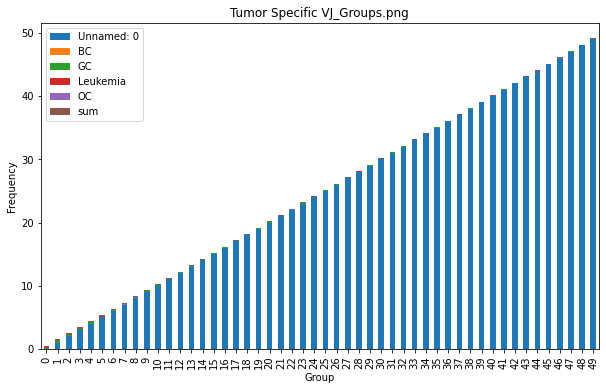

In [321]:
df = df1

# 绘制堆叠条形图
df1.plot(kind='bar', stacked=True, figsize=(10, 6), legend=True)

plt.title('Tumor Specific VJ_Groups.png')
plt.xlabel('Group')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # 如果 group 名字太长或者太多，可以旋转标签以改善显示

plt.savefig('/home/zengzw/tmp/figures/tumor specific VJ_Groups.png')
plt.show()



In [329]:
import pandas as pd

df = pd.read_csv('/home/zengzw/tmp/2_all_grouping_IGH.csv')
df



,chain,count,frequency,cdr3_nt,cdr3_aa,v_gene,d_gene,j_gene,c_gene,Sample,cancer type,data source,Analysis_tool,group,frequency_batch,frequency_batch_mul1000,group_vj
0,IGH,59,0.009965,TGTGCGAAAGATCGGAGTGGATACAGCTATGGGGACGGCTACTTTG...,CAKDRSGYSYGDGYFDYW,IGHV3-23,IGHD5-18,IGHJ4,/,HGSOC1-PB,healthy,HRA002184,TRUST,IGHV3-23&IGHD5-18&IGHJ4,0.000216,0.215803,IGHV3-23&IGHJ4
1,IGH,25,0.004222,TGTGCGAAAGATCGGAGTGGATACAGCTATGGGGACGGCTACTTTG...,CAKDRSGYSYGDGYFDYW,IGHV3-23,IGHD5-18,IGHJ4,IGHM,HGSOC1-PB,healthy,HRA002184,TRUST,IGHV3-23&IGHD5-18&IGHJ4,0.000091,0.091442,IGHV3-23&IGHJ4
2,IGH,12,0.002027,TGTGCGAAAGATCGATTAGTGGGGGCTATTGATGCTTTTGATATCTGG,CAKDRLVGAIDAFDIW,IGHV3-23,IGHD1-26,IGHJ3,IGHA2,HGSOC1-PB,healthy,HRA002184,TRUST,IGHV3-23&IGHD1-26&IGHJ3,0.000044,0.043892,IGHV3-23&IGHJ3
3,IGH,12,0.002027,TGTGCGAGAGGCTCTTCGGTGGTCATTCCCCTCCCGTTTGAGTCCTGG,CARGSSVVIPLPFESW,IGHV4-34,IGHD4-23,IGHJ4,IGHA2,HGSOC1-PB,healthy,HRA002184,TRUST,IGHV4-34&IGHD4-23&IGHJ4,0.000044,0.043892,IGHV4-34&IGHJ4
4,IGH,8,0.001351,TGTGCGAAAGATCGATTAGTGGGGGCTATTGATGCTTTTGATATCTGG,CAKDRLVGAIDAFDIW,IGHV3-23,IGHD1-26,IGHJ3,IGHA2,HGSOC1-PB,healthy,HRA002184,TRUST,IGHV3-23&IGHD1-26&IGHJ3,0.000029,0.029261,IGHV3-23&IGHJ3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61174,IGH,6040,0.001182,TGTGCACGGACAAAACGTAGAGATGACTACAATTTAGGCGTGTGGA...,CARTKRRDDYNLGVWRDYGMDVW,IGHV2-70,IGHD5-24,IGHJ6,IGHG1,GC10-Tumor,GC,HRA000704,VDJ,IGHV2-70&IGHD5-24&IGHJ6,0.000033,0.033106,IGHV2-70&IGHJ6
61175,IGH,2956,0.000578,TGTGCCAGAGGAGGCGATATTGTCGTGGTTCGGGAAGTTATTCCCG...,CARGGDIVVVREVIPGAWLDPW,IGHV4-30-4,/,IGHJ5,IGHG1,GC10-Tumor,GC,HRA000704,VDJ,IGHV4-30-4&/&IGHJ5,0.000016,0.016202,IGHV4-30-4&IGHJ5
61176,IGH,3608,0.000706,TGTGCGAGACTCCGAAACTTGGGGGAATGGCTCGAAAGACTTGACT...,CARLRNLGEWLERLDFW,IGHV4-59,/,IGHJ4,IGHG1,GC10-Tumor,GC,HRA000704,VDJ,IGHV4-59&/&IGHJ4,0.000020,0.019776,IGHV4-59&IGHJ4
61177,IGH,5452,0.001067,TGTGCGAGGGGGGGTGATGTTAGAAATGGCTACAAATACCGTTACT...,CARGGDVRNGYKYRYFQYW,IGHV3-21,IGHD5-24,IGHJ1,IGHG1,GC10-Tumor,GC,HRA000704,VDJ,IGHV3-21&IGHD5-24&IGHJ1,0.000030,0.029883,IGHV3-21&IGHJ1


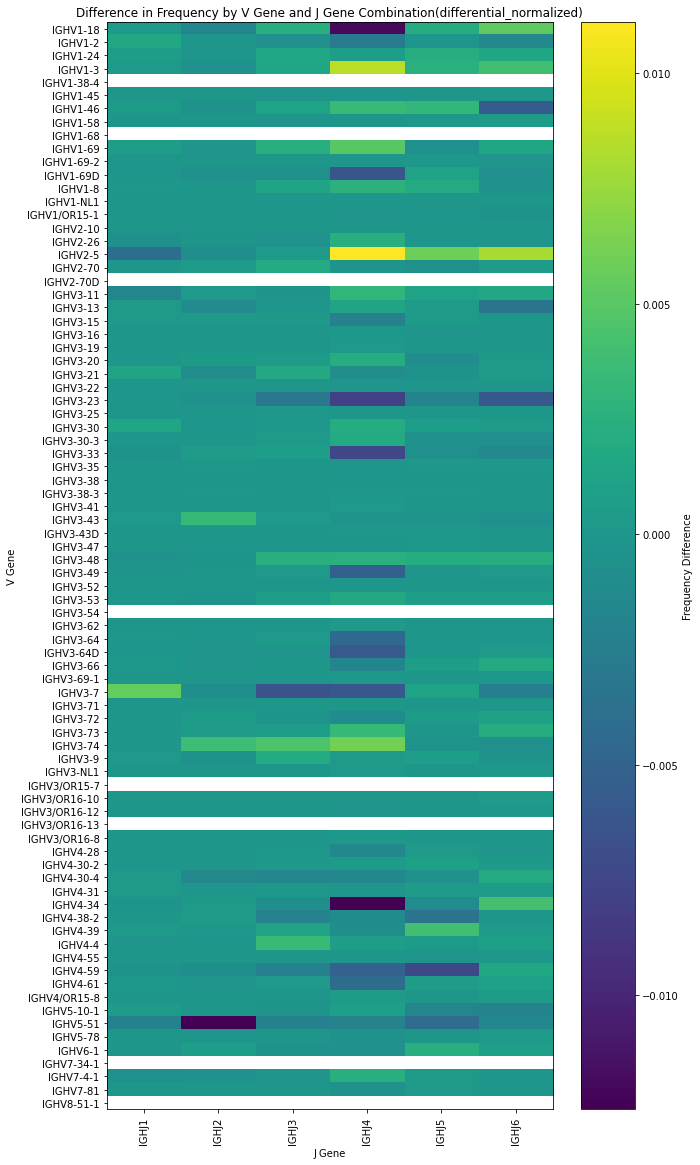

In [375]:
import pandas as pd

# 假设df是你的完整DataFrame
# df = pd.read_csv('/home/zengzw/tmp/2_all_grouping_IGH.csv')

# 筛选healthy数据
healthy_df = df[df['cancer type'] == 'healthy']

# 筛选非healthy数据
non_healthy_df = df[df['cancer type'] != 'healthy']

# 计算healthy的频率总和
healthy_pivot = healthy_df.pivot_table(index='v_gene', columns='j_gene', values='frequency', aggfunc='sum', fill_value=0)

# 计算非healthy的频率总和
non_healthy_pivot = non_healthy_df.pivot_table(index='v_gene', columns='j_gene', values='frequency', aggfunc='sum', fill_value=0)

# 归一化处理：每个值除以整张表的频率总和
total_healthy = healthy_pivot.sum().sum()  # 整个healthy表的频率总和
total_non_healthy = non_healthy_pivot.sum().sum()  # 整个non-healthy表的频率总和

healthy_normalized = healthy_pivot / total_healthy
non_healthy_normalized = non_healthy_pivot / total_non_healthy


# 计算差值
difference_normalized = non_healthy_normalized - healthy_normalized

import matplotlib.pyplot as plt
import numpy as np

# 绘制热图
plt.figure(figsize=(10, 20))
plt.imshow(difference_normalized, cmap='viridis', aspect='auto')

# 添加颜色条
plt.colorbar(label='Frequency Difference')

# 设置轴标签
plt.xlabel('J Gene')
plt.ylabel('V Gene')

# 设置轴刻度
plt.xticks(np.arange(len(difference_normalized.columns)), difference_normalized.columns, rotation=90)
plt.yticks(np.arange(len(difference_normalized.index)), difference_normalized.index)

# 设置标题
plt.title('Difference in Frequency by V Gene and J Gene Combination(differential_normalized)')
plt.savefig('/home/zengzw/tmp/figures/Difference in Frequency by V Gene and J Gene Combination(differential_normalized).png')
plt.show()


In [344]:
healthy_pivot.sum(axis=1)

v_gene
IGHV1-18     0.723233
IGHV1-2      0.292709
IGHV1-24     0.059989
IGHV1-3      0.229448
IGHV1-45     0.008097
               ...   
IGHV5-51     0.734159
IGHV5-78     0.006953
IGHV6-1      0.092551
IGHV7-4-1    0.185925
IGHV7-81     0.004827
Length: 74, dtype: float64

In [345]:
non_healthy_pivot.sum(axis=1)

v_gene
IGHV1-18      0.904082
IGHV1-2       0.339745
IGHV1-24      0.180450
IGHV1-3       0.549814
IGHV1-38-4    0.000711
                ...   
IGHV6-1       0.163329
IGHV7-34-1    0.001921
IGHV7-4-1     0.265654
IGHV7-81      0.003763
IGHV8-51-1    0.000030
Length: 82, dtype: float64

In [349]:
len(healthy_df['Sample'].value_counts())

31

In [350]:
len(non_healthy_df['Sample'].value_counts())

61